In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [196]:
data = pd.read_csv('./Data2/final.csv')
data.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,상권_코드,상권_코드_명,점포매출액,...,행정동_코드_명_신사동,행정동_코드_명_신원동,행정동_코드_명_은천동,행정동_코드_명_인헌동,행정동_코드_명_조원동,행정동_코드_명_중앙동,행정동_코드_명_청룡동,행정동_코드_명_청림동,행정동_코드_명_행운동,행정동_코드_명
0,2014,2,A,골목상권,11620,관악구,11620525,1000804,당곡길,5.713964e+08,...,0,0,0,0,0,0,0,0,0,보라매동
1,2014,2,A,골목상권,11620,관악구,11620525,1000811,봉천로13길,1.337315e+08,...,0,0,0,0,0,0,0,0,0,보라매동
2,2014,2,A,골목상권,11620,관악구,11620545,1000783,관악로30길,2.019276e+08,...,0,0,0,0,0,0,0,1,0,청림동
3,2014,2,A,골목상권,11620,관악구,11620545,1000835,청림3길,1.604613e+08,...,0,0,0,0,0,0,0,1,0,청림동
4,2014,2,A,골목상권,11620,관악구,11620565,1000786,구암길,3.152107e+07,...,0,0,0,0,0,0,0,0,0,성현동


### 순서 정리 하기

In [197]:
desc1=data.iloc[:,:7]
desc2=data['행정동_코드_명']
desc3=data.iloc[:,7:9]
target_feature=data.iloc[:,9:-1]

In [198]:
data = pd.concat([desc1,desc2,desc3,target_feature],axis=1)
data.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,...,행정동_코드_명_신림동,행정동_코드_명_신사동,행정동_코드_명_신원동,행정동_코드_명_은천동,행정동_코드_명_인헌동,행정동_코드_명_조원동,행정동_코드_명_중앙동,행정동_코드_명_청룡동,행정동_코드_명_청림동,행정동_코드_명_행운동
0,2014,2,A,골목상권,11620,관악구,11620525,보라매동,1000804,당곡길,...,0,0,0,0,0,0,0,0,0,0
1,2014,2,A,골목상권,11620,관악구,11620525,보라매동,1000811,봉천로13길,...,0,0,0,0,0,0,0,0,0,0
2,2014,2,A,골목상권,11620,관악구,11620545,청림동,1000783,관악로30길,...,0,0,0,0,0,0,0,0,1,0
3,2014,2,A,골목상권,11620,관악구,11620545,청림동,1000835,청림3길,...,0,0,0,0,0,0,0,0,1,0
4,2014,2,A,골목상권,11620,관악구,11620565,성현동,1000786,구암길,...,0,0,0,0,0,0,0,0,0,0


In [199]:
data.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '행정동_코드_명', '상권_코드', '상권_코드_명', '점포매출액', '점포수', '개업_점포_수',
       '프랜차이즈_점포_수', '총_직장_인구_수', '연령대_10_직장_인구_수', '점포수1', '개업_점포_수1',
       '프랜차이즈_점포_수1', '총_직장_인구_수1', '연령대_10_직장_인구_수1', '점포수^21',
       '점포수 개업_점포_수1', '점포수 프랜차이즈_점포_수1', '점포수 총_직장_인구_수1',
       '점포수 연령대_10_직장_인구_수1', '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1',
       '개업_점포_수 총_직장_인구_수1', '개업_점포_수 연령대_10_직장_인구_수1', '프랜차이즈_점포_수^21',
       '프랜차이즈_점포_수 총_직장_인구_수1', '프랜차이즈_점포_수 연령대_10_직장_인구_수1', '총_직장_인구_수^21',
       '총_직장_인구_수 연령대_10_직장_인구_수1', '연령대_10_직장_인구_수^21', '점포수2', '개업_점포_수2',
       '프랜차이즈_점포_수2', '총_직장_인구_수2', '연령대_10_직장_인구_수2', '점포수^22',
       '점포수 개업_점포_수2', '점포수 프랜차이즈_점포_수2', '점포수 총_직장_인구_수2',
       '점포수 연령대_10_직장_인구_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2',
       '개업_점포_수 총_직장_인구_수2', '개업_점포_수 연령대_10_직장_인구_수2', '프랜차이즈_점포_수^22',
       '프랜차이즈_점포_수 총_직장_인구_수2', '프랜차이즈_점포_수 연령대_10_직장_인구_수2', '총_직장_인구_수^22',
       '총_직장_인구_

In [200]:
data.to_csv('./data2/final2.csv',index=False)

### 정규화 필요한 컬럼 따로 빼기

In [201]:
normalize_feature = data.iloc[:,11:56]
col_name = "정규화-" + data.columns[11:56] 

In [202]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_scaled =scaler.fit_transform(normalize_feature)
feature_scaled_df=pd.DataFrame(feature_scaled,columns=col_name)

In [203]:
data=pd.concat([data,feature_scaled_df],axis=1)

### 정규화 전후 비교하기

In [204]:
data.columns[11:80]

Index(['점포수', '개업_점포_수', '프랜차이즈_점포_수', '총_직장_인구_수', '연령대_10_직장_인구_수', '점포수1',
       '개업_점포_수1', '프랜차이즈_점포_수1', '총_직장_인구_수1', '연령대_10_직장_인구_수1', '점포수^21',
       '점포수 개업_점포_수1', '점포수 프랜차이즈_점포_수1', '점포수 총_직장_인구_수1',
       '점포수 연령대_10_직장_인구_수1', '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1',
       '개업_점포_수 총_직장_인구_수1', '개업_점포_수 연령대_10_직장_인구_수1', '프랜차이즈_점포_수^21',
       '프랜차이즈_점포_수 총_직장_인구_수1', '프랜차이즈_점포_수 연령대_10_직장_인구_수1', '총_직장_인구_수^21',
       '총_직장_인구_수 연령대_10_직장_인구_수1', '연령대_10_직장_인구_수^21', '점포수2', '개업_점포_수2',
       '프랜차이즈_점포_수2', '총_직장_인구_수2', '연령대_10_직장_인구_수2', '점포수^22',
       '점포수 개업_점포_수2', '점포수 프랜차이즈_점포_수2', '점포수 총_직장_인구_수2',
       '점포수 연령대_10_직장_인구_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2',
       '개업_점포_수 총_직장_인구_수2', '개업_점포_수 연령대_10_직장_인구_수2', '프랜차이즈_점포_수^22',
       '프랜차이즈_점포_수 총_직장_인구_수2', '프랜차이즈_점포_수 연령대_10_직장_인구_수2', '총_직장_인구_수^22',
       '총_직장_인구_수 연령대_10_직장_인구_수2', '연령대_10_직장_인구_수^22', '행정동_코드_명_낙성대동',
       '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동', '행정동_코드_명_대학동',
  

In [205]:
feature = data[['점포수', '개업_점포_수', '프랜차이즈_점포_수', '총_직장_인구_수', '연령대_10_직장_인구_수', '점포수1',
       '개업_점포_수1', '프랜차이즈_점포_수1', '총_직장_인구_수1', '연령대_10_직장_인구_수1', '점포수^21',
       '점포수 개업_점포_수1', '점포수 프랜차이즈_점포_수1', '점포수 총_직장_인구_수1',
       '점포수 연령대_10_직장_인구_수1', '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1',
       '개업_점포_수 총_직장_인구_수1', '개업_점포_수 연령대_10_직장_인구_수1', '프랜차이즈_점포_수^21',
       '프랜차이즈_점포_수 총_직장_인구_수1', '프랜차이즈_점포_수 연령대_10_직장_인구_수1', '총_직장_인구_수^21',
       '총_직장_인구_수 연령대_10_직장_인구_수1', '연령대_10_직장_인구_수^21', '점포수2', '개업_점포_수2',
       '프랜차이즈_점포_수2', '총_직장_인구_수2', '연령대_10_직장_인구_수2', '점포수^22',
       '점포수 개업_점포_수2', '점포수 프랜차이즈_점포_수2', '점포수 총_직장_인구_수2',
       '점포수 연령대_10_직장_인구_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2',
       '개업_점포_수 총_직장_인구_수2', '개업_점포_수 연령대_10_직장_인구_수2', '프랜차이즈_점포_수^22',
       '프랜차이즈_점포_수 총_직장_인구_수2', '프랜차이즈_점포_수 연령대_10_직장_인구_수2', '총_직장_인구_수^22',
       '총_직장_인구_수 연령대_10_직장_인구_수2', '연령대_10_직장_인구_수^22', '행정동_코드_명_낙성대동',
       '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동', '행정동_코드_명_대학동',
       '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동', '행정동_코드_명_서림동',
       '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동', '행정동_코드_명_신사동',
       '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동', '행정동_코드_명_조원동',
       '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동', '행정동_코드_명_행운동']]
target = data['점포매출액']

In [206]:
from module.default import basic
from module.error import model_err_measure
basic(feature,target)
model_err_measure(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.8878202574181222
test :  0.8204300629565658
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.8161352973327398
test :  0.787000068050725
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.810297550618289
test :  0.787404466013699
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.8098182813469921
test :  0.7864823982400216
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.990551858658183
test :  0.937671887496415
--------------------------------------------------


,model_name,MSE,MAE,RMSE,R2Score
0,lr,3.956500e+16,1.367477e+08,1.989095e+08,0.738619
0,rd,3.981805e+16,1.402582e+08,1.995446e+08,0.729541
0,ls,4.012844e+16,1.407614e+08,2.003209e+08,0.731343


In [207]:
feature=data[['행정동_코드_명_낙성대동', '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동',
       '행정동_코드_명_대학동', '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동',
       '행정동_코드_명_서림동', '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동',
       '행정동_코드_명_신사동', '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동',
       '행정동_코드_명_조원동', '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동',
       '행정동_코드_명_행운동', '정규화-점포수', '정규화-개업_점포_수', '정규화-프랜차이즈_점포_수',
       '정규화-총_직장_인구_수', '정규화-연령대_10_직장_인구_수', '정규화-점포수1', '정규화-개업_점포_수1',
       '정규화-프랜차이즈_점포_수1', '정규화-총_직장_인구_수1', '정규화-연령대_10_직장_인구_수1',
       '정규화-점포수^21', '정규화-점포수 개업_점포_수1', '정규화-점포수 프랜차이즈_점포_수1',
       '정규화-점포수 총_직장_인구_수1', '정규화-점포수 연령대_10_직장_인구_수1', '정규화-개업_점포_수^21',
       '정규화-개업_점포_수 프랜차이즈_점포_수1', '정규화-개업_점포_수 총_직장_인구_수1',
       '정규화-개업_점포_수 연령대_10_직장_인구_수1', '정규화-프랜차이즈_점포_수^21',
       '정규화-프랜차이즈_점포_수 총_직장_인구_수1', '정규화-프랜차이즈_점포_수 연령대_10_직장_인구_수1',
       '정규화-총_직장_인구_수^21', '정규화-총_직장_인구_수 연령대_10_직장_인구_수1',
       '정규화-연령대_10_직장_인구_수^21', '정규화-점포수2', '정규화-개업_점포_수2', '정규화-프랜차이즈_점포_수2',
       '정규화-총_직장_인구_수2', '정규화-연령대_10_직장_인구_수2', '정규화-점포수^22',
       '정규화-점포수 개업_점포_수2', '정규화-점포수 프랜차이즈_점포_수2', '정규화-점포수 총_직장_인구_수2',
       '정규화-점포수 연령대_10_직장_인구_수2', '정규화-개업_점포_수^22', '정규화-개업_점포_수 프랜차이즈_점포_수2',
       '정규화-개업_점포_수 총_직장_인구_수2', '정규화-개업_점포_수 연령대_10_직장_인구_수2',
       '정규화-프랜차이즈_점포_수^22', '정규화-프랜차이즈_점포_수 총_직장_인구_수2',
       '정규화-프랜차이즈_점포_수 연령대_10_직장_인구_수2', '정규화-총_직장_인구_수^22',
       '정규화-총_직장_인구_수 연령대_10_직장_인구_수2', '정규화-연령대_10_직장_인구_수^22']]
target = data['점포매출액']

In [208]:
basic(feature,target)
model_err_measure(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.8517776252851557
test :  0.7652604676879398
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.8138843307338972
test :  0.7920394871869845
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.8071348990197287
test :  0.7900739741084706
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.8075455333849492
test :  0.7891760835935336
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.9900295103828135
test :  0.9346251616859801
--------------------------------------------------


,model_name,MSE,MAE,RMSE,R2Score
0,lr,4.884909e+16,1.522922e+08,2.210183e+08,0.724619
0,rd,4.688587e+16,1.522021e+08,2.165315e+08,0.721835
0,ls,4.734678e+16,1.528415e+08,2.175932e+08,0.722623


### 그리드 서치 이용해서 최적의 하이퍼 파라미터 값 확인하기

In [209]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.model_selection import train_test_split , GridSearchCV

In [210]:
params ={'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}

train_input, test_input, train_target , test_target  = \
    train_test_split(feature,target,test_size=0.2)

In [211]:
gs = GridSearchCV(
    Ridge(),
    params,
    return_train_score=True
)

gs.fit(train_input,train_target)

modelName = gs.best_estimator_
modelName.score(test_input,test_target)
gs.best_params_

{'alpha': 0.001}

In [212]:
test = gs.cv_results_['mean_test_score']
train = gs.cv_results_['mean_train_score']

In [213]:
df=pd.concat([pd.Series(test),pd.Series(train)],axis=1)
df.columns = ['test','train']

In [214]:
df.index = np.log10(params['alpha'])

In [215]:
df

,test,train
-4.0,0.794272,0.820825
-3.0,0.794811,0.820798
-2.0,0.794762,0.819986
-1.0,0.791409,0.816090
0.0,0.790666,0.812818
1.0,0.786793,0.802804
2.0,0.720652,0.730384
3.0,0.621431,0.627162
4.0,0.510750,0.514771


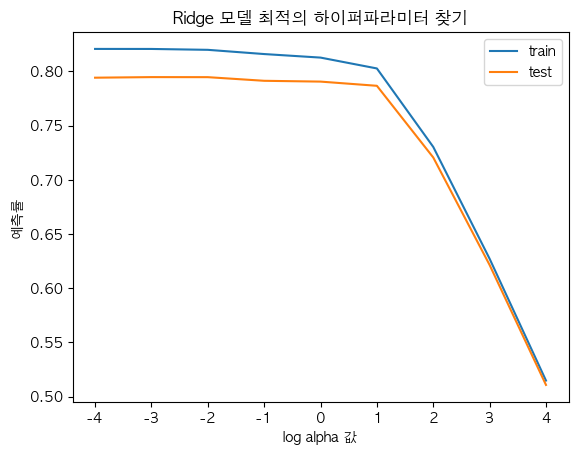

In [216]:
df['train'].plot(
    legend='train'
)
df['test'].plot(
    legend='test'
)

plt.title('Ridge 모델 최적의 하이퍼파라미터 찾기')

plt.legend()
plt.xlabel('log alpha 값')
plt.ylabel('예측률')

plt.show()

In [217]:
params ={'alpha':[0.1,1,10,10**2,10**3,10**4,10**5,10**6,10**7,10**8,10**9,10**10]}

In [218]:
gs = GridSearchCV(
    Lasso(),
    params,
    return_train_score=True
)

gs.fit(train_input,train_target)

modelName = gs.best_estimator_
modelName.score(test_input,test_target)
gs.best_params_

{'alpha': 100000}

In [219]:
test = gs.cv_results_['mean_test_score']
train = gs.cv_results_['mean_train_score']
df=pd.concat([pd.Series(test),pd.Series(train)],axis=1)
df.columns = ['test','train']
df.index = np.log10(params['alpha'])

In [221]:
df

,test,train
-1.0,0.789123,0.813071
0.0,0.789123,0.813071
1.0,0.789123,0.813071
2.0,0.789124,0.813071
3.0,0.789130,0.813065
4.0,0.789200,0.813004
5.0,0.789974,0.812044
6.0,0.789150,0.801147
7.0,0.708891,0.716277
8.0,0.548717,0.552854


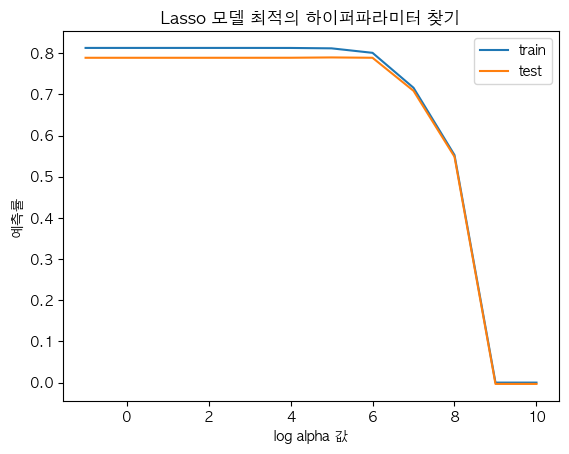

In [220]:
df['train'].plot(
    legend='train'
)
df['test'].plot(
    legend='test'
)

plt.title('Lasso 모델 최적의 하이퍼파라미터 찾기')

plt.legend()
plt.xlabel('log alpha 값')
plt.ylabel('예측률')

plt.show()

### Ridge 로 사용할 경우 alpah = 10
### Lasso 로 사용할 경우 alpha = 10**6

### 머신러닝 모델 만들어서 저장하기

### 모델 만들기

In [226]:
feature_com=feature.to_numpy()
target_com=target.to_numpy()

In [227]:
ridge=Ridge(alpha=10)
lasso=Lasso(alpha=10**6)

In [228]:
ridge.fit(feature_com,target_com)
lasso.fit(feature_com,target_com)

Lasso(alpha=1000000)

### 저장하기

In [222]:
import joblib

In [231]:
filename = './Data2/gwanak_ridge_model.h5'
joblib.dump(ridge,filename=filename)

['./Data2/gwanak_ridge_model.h5']

In [232]:
filename = './Data2/gwanak_lasso_model.h5'
joblib.dump(lasso,filename=filename)

['./Data2/gwanak_lasso_model.h5']

In [233]:
model = joblib.load('./Data2/gwanak_lasso_model.h5')

In [266]:
test=data.iloc[3,56:].to_numpy()
answer=data.iloc[3,10:11].to_numpy()

In [267]:
predict=model.predict([test])

In [268]:
answer - predict

array([185094146.33104375], dtype=object)